#### Kontrol Automatikoa.Maiatzeko deialdia (2024)

##### 1. problema
 Berrelikadura unitarioko sistema batean, $G(s)={\displaystyle \frac{10}{\left(s+5.2\right)^{2}}},$ konpentsazio sare bat, $C(s)=K{\displaystyle \frac{\left(s+\alpha\right)}{\left(s+\beta\right)}}$, diseinatu nahi da Erroen Kokaeraren teknikaren bitartez, hurrengo pausuak jarraituz: 

- Sarearen poloa finkatzen da $\beta=20$ balioan.

- Beste bi parametroak K eta $\alpha$  doitzen dira (EK metodoa erabiltzen) hurrengo espezifikazioak lortzeko:

i. Irteera-seinalearen gaindiketa azkenengo balioaren $\%5$ edo txikiagoa izango da.

ii. Puntako denbora $T_{1}\leq0.3$ s.

Hau da eskatzen dena:

    (a) Lortu sarearen parametroak eta esan zein den lortutako sare mota. 

    (b) Aztertu egonkorreko erantzuna, maila sarrera eta arrapala sarreran aurrean lortutako prezisioa azalduz.

    (c) Aztertu iragankorra. Azaldu espezifikazioak lortzen diren ala ez.

    (d) Aztertu kontrol seinalea. Zergatik kontrol seinalea ez doa zerora denbora aurrera doanean?


#### Ebazpena

Lehengo sartu datuak

In [5]:
s=%s;
g=10/(s + 5.2)^2;g.dt='c'

R=5/100
d=1/sqrt((%pi/log(R))^2+1)
T1=0.3

 g = [rational] of s
          10          
   -----------------  
   27.04 +10.4s +s^2  
 R = 
   0.05
 d = 
   0.6901067
 T1 = 
   0.3


Lehengo pasu bezala espezifikazioen zonaldea zehazten dira, eta plantaren EK ere marrazten da.

Gogoratu EK begizta irekiko transferentzia funtziorekin egiten dela: $H(s)G(s)$

Puntu bat aukeratuta, puntu hori ere marrazten da. Adibidez $s_d= -12+10 j$


 wd = 
   10.471976
 re = [1x2 double]
   0.   50.
 s2 = [1x2 double]
   0. + 10.471976i  -50. + 10.471976i
 sd = 
  -11. + 10.i


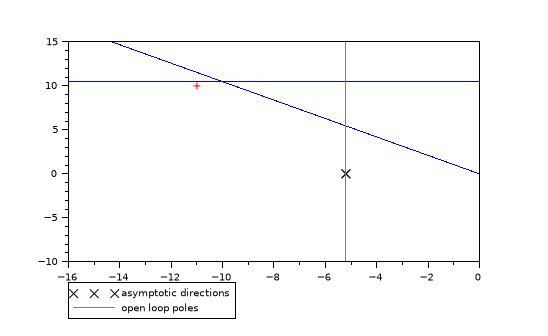

In [9]:
// d kte
wn=[0,50];
s1=(-d+sqrt(d^2-1))*wn;
// T1 kte
wd=%pi/T1
re=[0,50]
s2=-re+wd*%i
scf(1);clf()
plot(real(s1),imag(s1))
plot(real(s2),imag(s2))
evans(g)
sd=-11+10*%i
plot(real(sd),imag(sd),'+r')
replot([-15,-10,0,15])

Orain fase baldintza erabiltzen da kontrolagailua diseinatzeko, baina gogoratuz hemen kontrolagailuaren forma dela

$Sarea(s)=K\displaystyle\frac{(s+\alpha)}{(s+20)}$

Eta $1/(s+20)$ sartu behar da fasearen kalkuloan. Baita ere, askatzeko $a$, forma aldatzen da (diskretuan egiten dugun bezala da)

Oharra: Hemen kontrolagailua kausala da.
 

In [14]:
[db,phi]=dbphi(horner(g/(s+20),sd));
pha=(180-phi)*%pi/180;

a = imag(sd)/tan(pha)-real(sd)
[db,phi]=dbphi(horner((s+a)/(s+20)*g,sd));
// Konprobazioa
disp('Fase',phi)

 a = 
   7.7043804
  "Fase"
   180.


Orain Modulu baldintza

In [16]:
K=1/abs(horner((s+a)/(s+20)*g,sd))

sarea=K*(s+a)/(s+20);
gitxia=(sarea*g)/.(1);
disp(roots(gitxia.den))

 K = 
   17.076000
  -11. + 10.i
  -11. - 10.i
  -8.4 + 0.i


Polo desiratuak daude. Zein da sare mota, aurrerapen sarea, PD baten antzerakoa.

Orain b) eta c) atalekoa. c) atalari dagokionez, denbora eremuko erantzuna lortuz, espezifikazioak aztertzen dira.

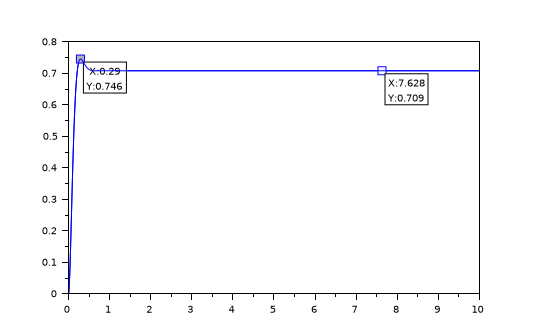

In [22]:
%plot inline
t=[0:0.01:10];
y=csim('step',t,gitxia);
scf(1);
plot(t,y)

Kalkulatu daiteke gaindiketa $R= \% (0.746-0.709)/0.709 *100=\%5.2 $ eta puntako denbora $T_1= 0.29$. Beraz espezifikaziak ia ia lortzen dira. baina sistema pixka bat oszilakorragoa da, betiko arrazioagatik, zeroren eragina, $-7.7$ puntuan eta gutxigatik bada ere, elementu garrantzitsua da, erlatiboki, hurbil dagolako jatorritik.

b) atalari dagokionez, baita ere ikusten da errorea ez dela zero, sistema 0 motakoa delako. Arrapala sarreraren aurrean, horregatik, errorea infinitua izango zen. Ez du pena merezi kalkulatzea, badakigu 0 motakoa delako.

Orain d) atala.

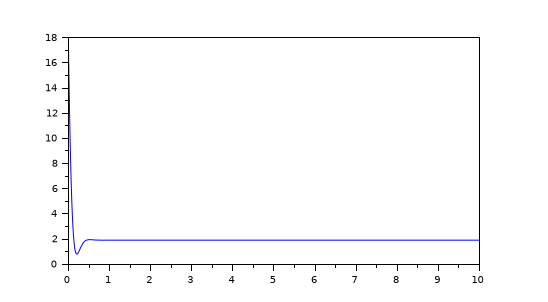

In [24]:
uitxia1=((sarea)/.(g));

u1=csim('step',t,uitxia1);
scf(1);
plot(t,u1)

Kontrol balioak ez dirudite oso altuak, beti ere, gogoratuz ez dakigula sistemaren benetako ezaugarriak.

Balioak ez dira egiten oso baxuak, balioa ez  doalako zerora, beraz, zona hilarekin ez dira espero arazoak.

Zergatik kontrol seinalea ez da zero? Sistema 0 motakoa delako. beste motakoa izango balitz, zerora joango zen, maila sarrerakin, sistema egonkorra bada.

Hobetu daiteke irteera? Zerbait erraza egiteko, aztertu daiteke EKa.

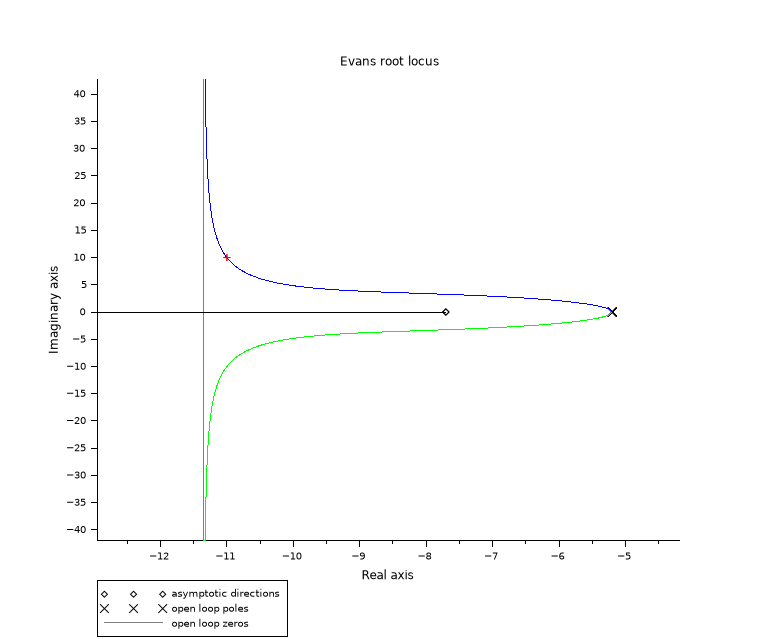

In [30]:
%plot inline
evans(sarea*g,200)
plot(real(sd),imag(sd),'+r')

K pixka bat jaitsiz, poloak moteltzen dira abiadura ere pixka bat jaitsiz.

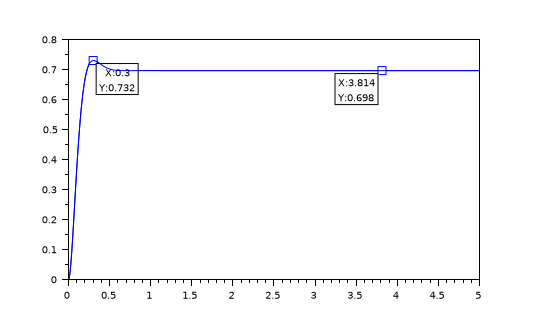

In [40]:
%plot inline
gitxia=(0.95*sarea*g)/.(1);
t=[0:0.01:5];
y=csim('step',t,gitxia);
scf(1);
plot(t,y)

Horrela $T_1=0.3$ eta $\% R= (0.732-0.698)/0.698 = \% 4.88, espezifikazioak bebetzen. Noski beti aldatu zitezkeen haseirako espezifikazioak eta errepikatu diseinua.